In [550]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [551]:

df = pd.read_csv("Dataset-SA.csv")

In [552]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,BAJAJ 17 L Solo Microwave Oven1701MT White,4498,1,worst experience ever!,not working properly,neutral
1,ScotchBrite Sponge WipeLarge Pack of 3,189,5,just wow!,very good,positive
2,limraz furniture Engineered Wood Computer Desk...,1298,5,classy product,it is perfect if you want to work on the compu...,positive
3,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,simply awesome,thanks flipkart,positive
4,KENT Aura Portable Room Air PurifierPink,6999,5,simply awesome,thanks product looks good not sure if any inst...,positive
...,...,...,...,...,...,...
145,Mivi Fort S24 Soundbar with FM Mode and 2 full...,1999,5,just wow!,great first hand experiencetotally worth the m...,positive
146,BROWNIE Engineered Wood Study TableFree Standi...,1299,5,classy product,good product,positive
147,LA VERNE Microfibre Stripes Cushion Pack of 3W...,379,5,perfect product!,very happy with the productfull paisa vasool,positive
148,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,59990,5,awesome,i had purchased the laptop in may got it for r...,positive


In [553]:
df.isnull().sum()

product_name      0
product_price     0
Rate              0
Review           19
Summary           0
Sentiment         0
dtype: int64

In [554]:
df = df.dropna(subset=["Review"])

In [555]:
df.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [556]:
df = df[pd.to_numeric(df["product_price"], errors="coerce").notnull()]
df["product_price"] = df["product_price"].astype(int)


In [557]:
print(df['Rate'].value_counts(dropna=True))


Rate
5    76
4    30
1    20
3     3
2     2
Name: count, dtype: int64


In [558]:
df = df[pd.to_numeric(df["Rate"], errors="coerce").notnull()]
df["Rate"] = df["Rate"].astype(int)

In [559]:
df[["Rate", "product_price"]] = df[["Rate", "product_price"]].astype(int)


In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   131 non-null    object
 1   product_price  131 non-null    int64 
 2   Rate           131 non-null    int64 
 3   Review         131 non-null    object
 4   Summary        131 non-null    object
 5   Sentiment      131 non-null    object
dtypes: int64(2), object(4)
memory usage: 7.2+ KB


<Axes: >

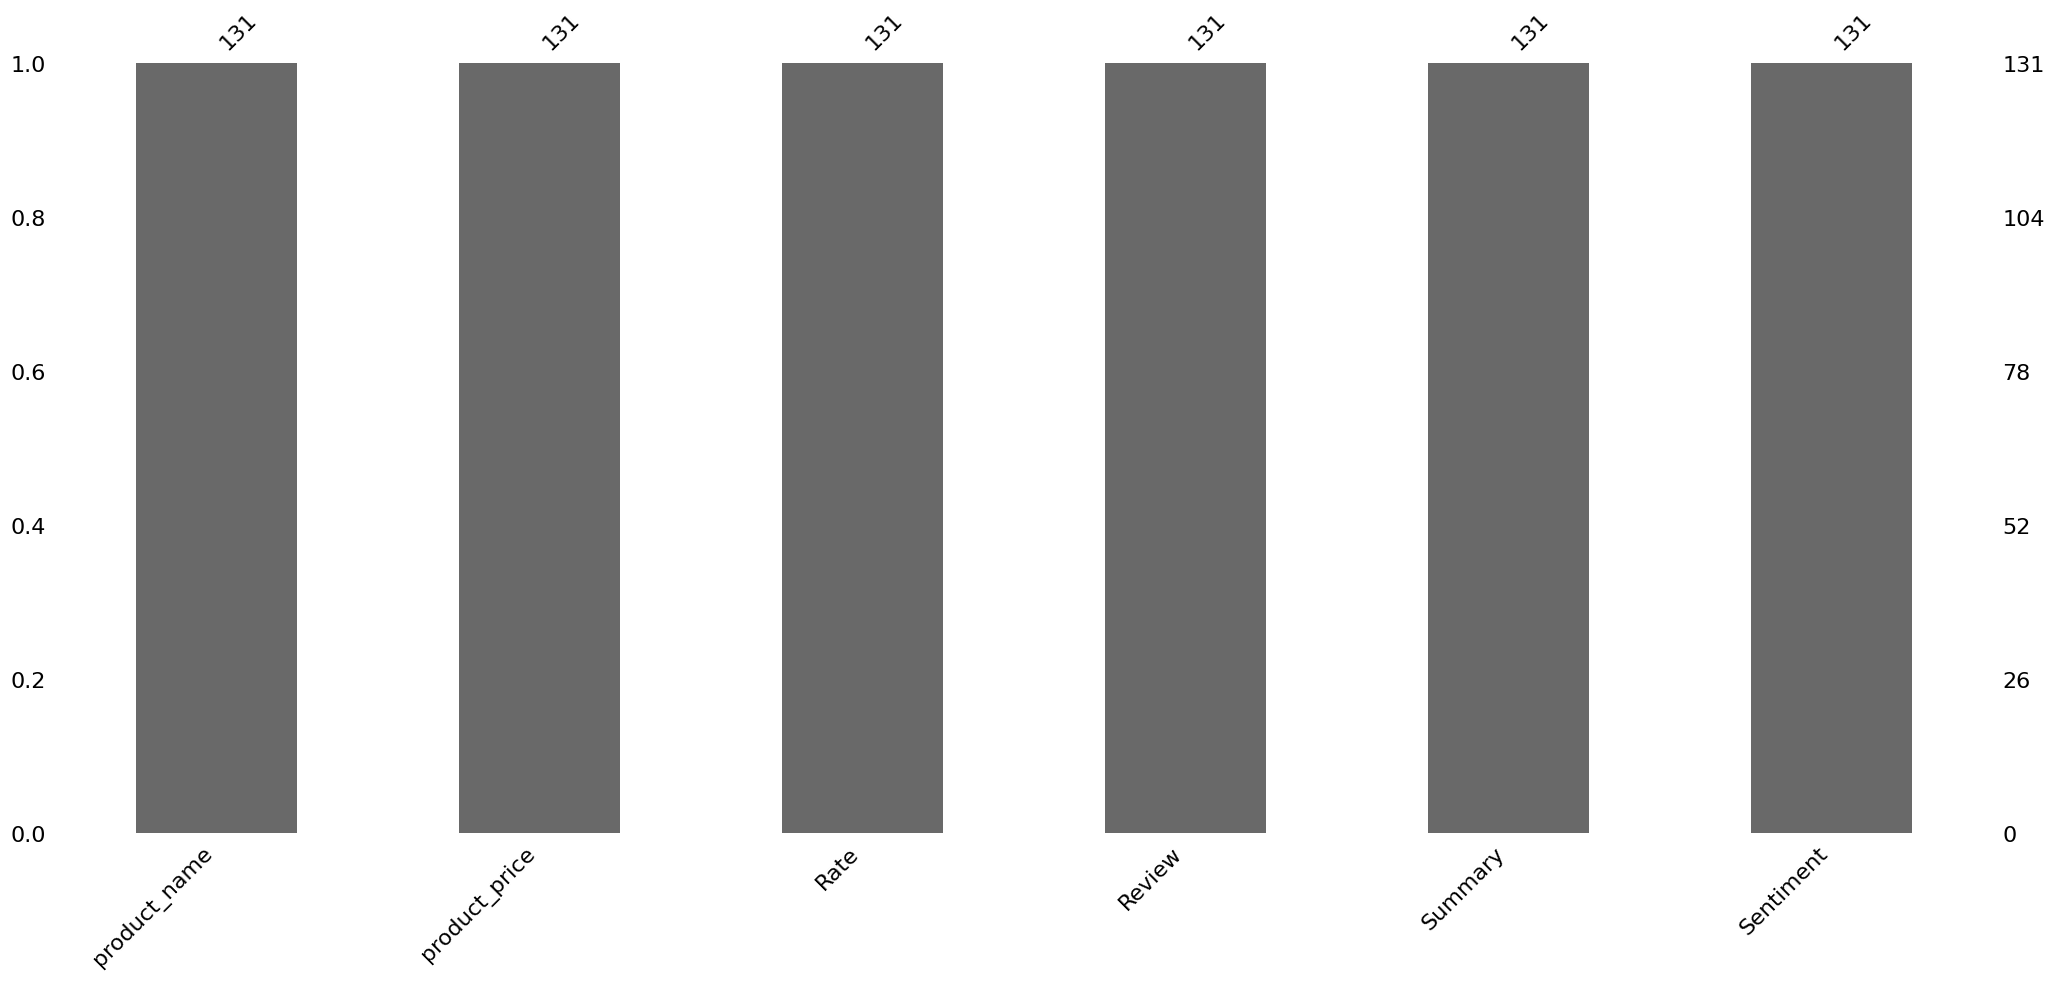

In [561]:
msno.bar(df)

<Axes: >

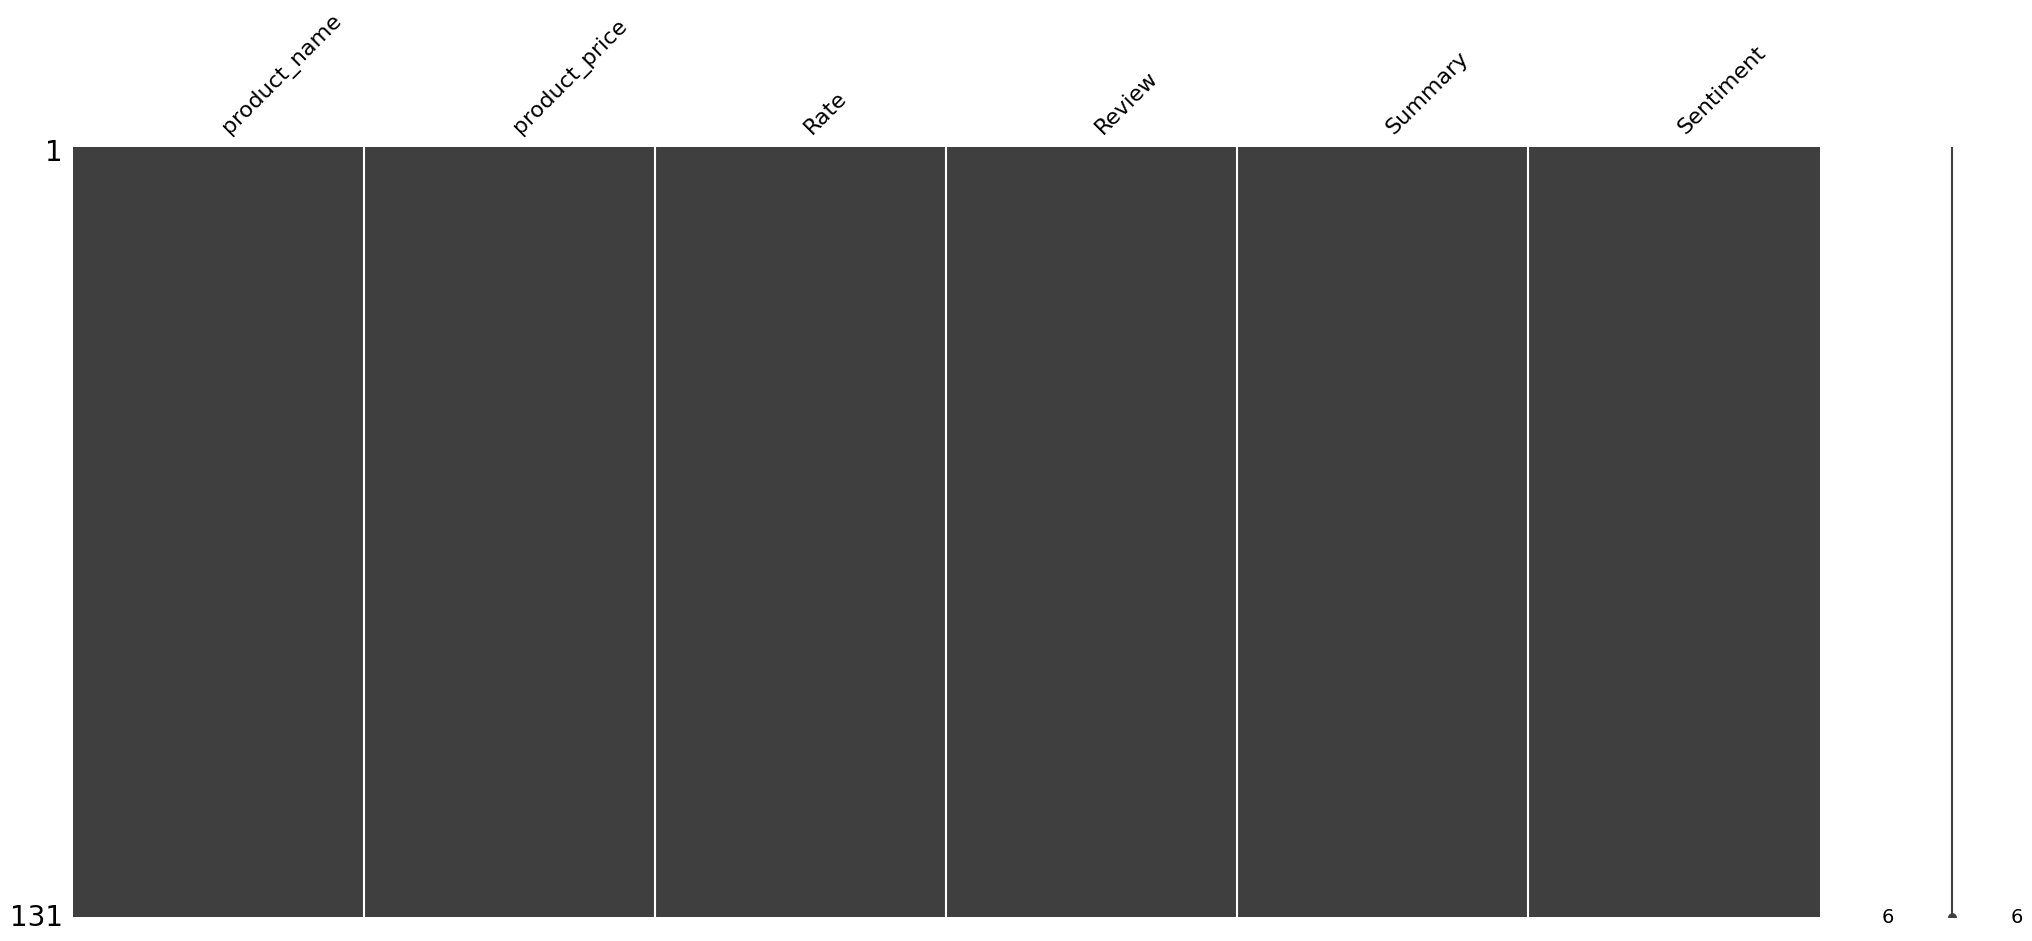

In [562]:
msno.matrix(df)

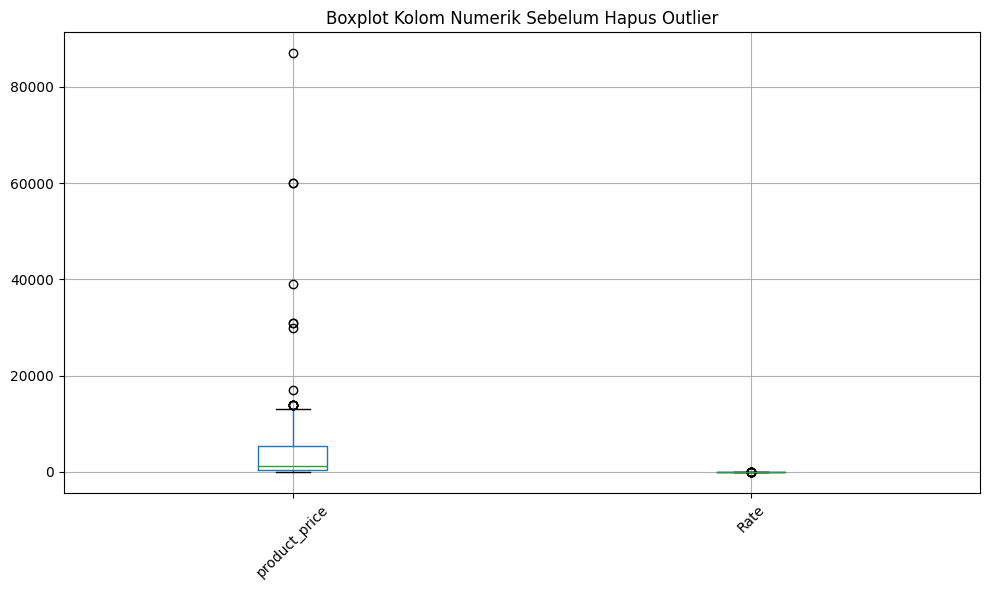

In [563]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Boxplot Kolom Numerik Sebelum Hapus Outlier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

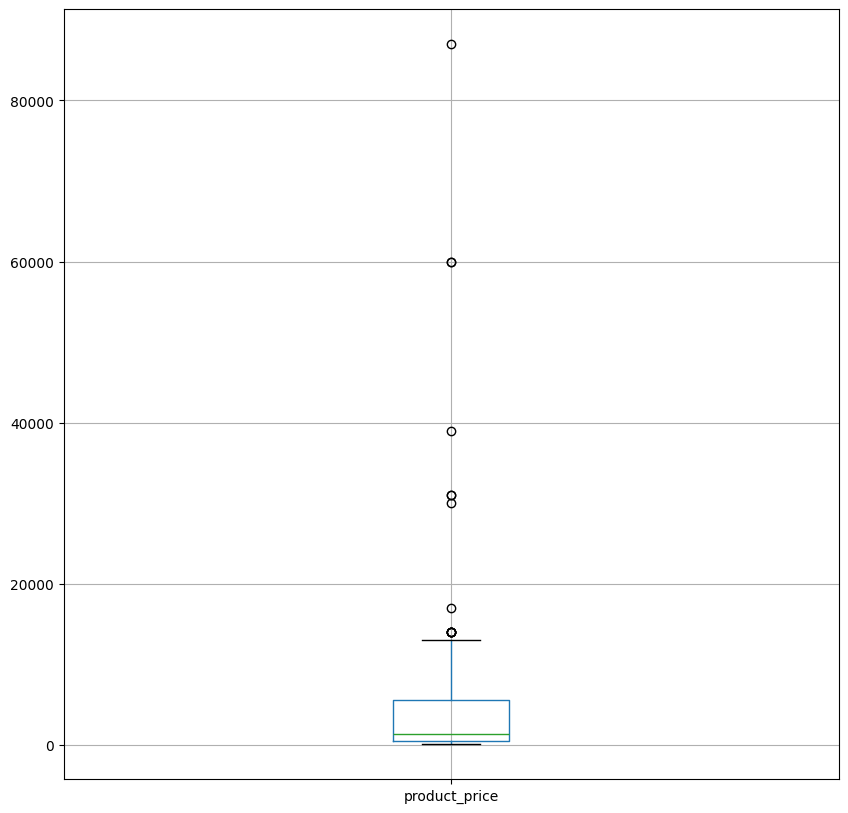

In [564]:
#cek outlier product_price
plt.figure(figsize=(10, 10))  # Penulisan yang benar
df.boxplot(column=['product_price'])
plt.show()

In [565]:
# Quartile & IQR(Age)
Q1_product_price = df['product_price'].quantile(0.25)
Q3_product_price = df['product_price'].quantile(0.75)
IQR_product_price = Q3_product_price - Q1_product_price

#batas atas dan bawah
lower_product_price = Q1_product_price - 1.5 * IQR_product_price
upper_product_price = Q3_product_price + 1.5 * IQR_product_price

# menampilkan
print(f'Q1 = {Q1_product_price}, Q3 = {Q3_product_price}, IQR = {IQR_product_price}')
print(f'lower_product_price = {lower_product_price}, upper_product_price = {upper_product_price}')

Q1 = 414.0, Q3 = 5499.0, IQR = 5085.0
lower_product_price = -7213.5, upper_product_price = 13126.5


In [566]:
# menampilkan data outlier
df[(df['product_price'] < lower_product_price) | (df['product_price'] > upper_product_price)].shape

(14, 6)

In [567]:
# Menampilkan data tanpa outlier
df['product_price'] = np.where(df['product_price'] > upper_product_price, upper_product_price,
                     np.where(df['product_price'] < lower_product_price, lower_product_price, df['product_price']))

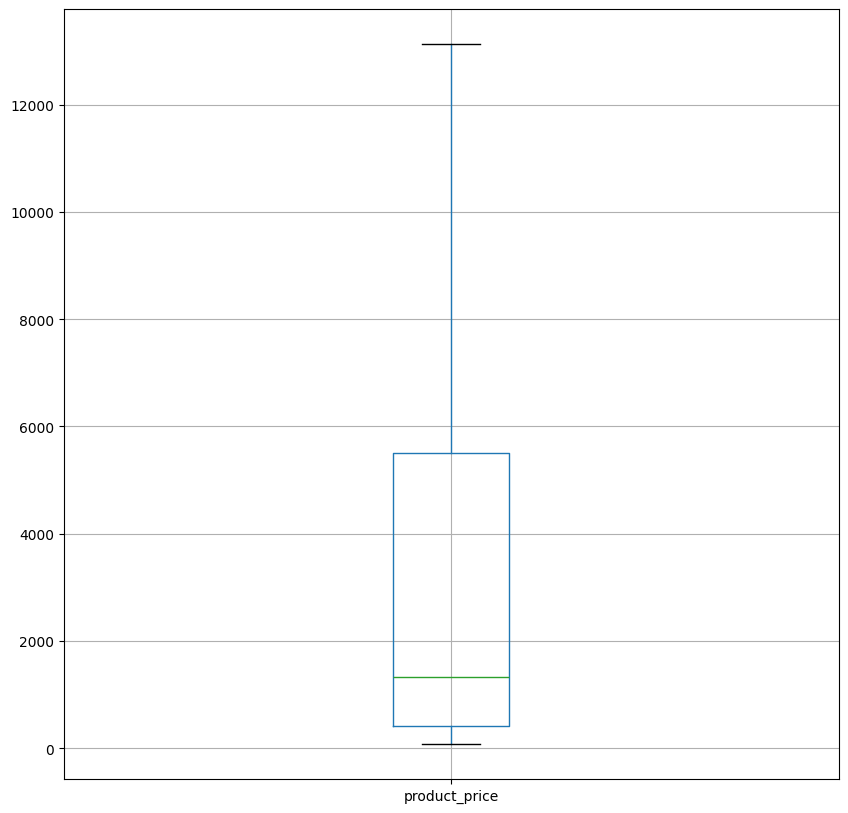

In [568]:
#cek kembali
plt.figure(figsize=(10, 10))  # Penulisan yang benar
df.boxplot(column=['product_price'])
plt.show()

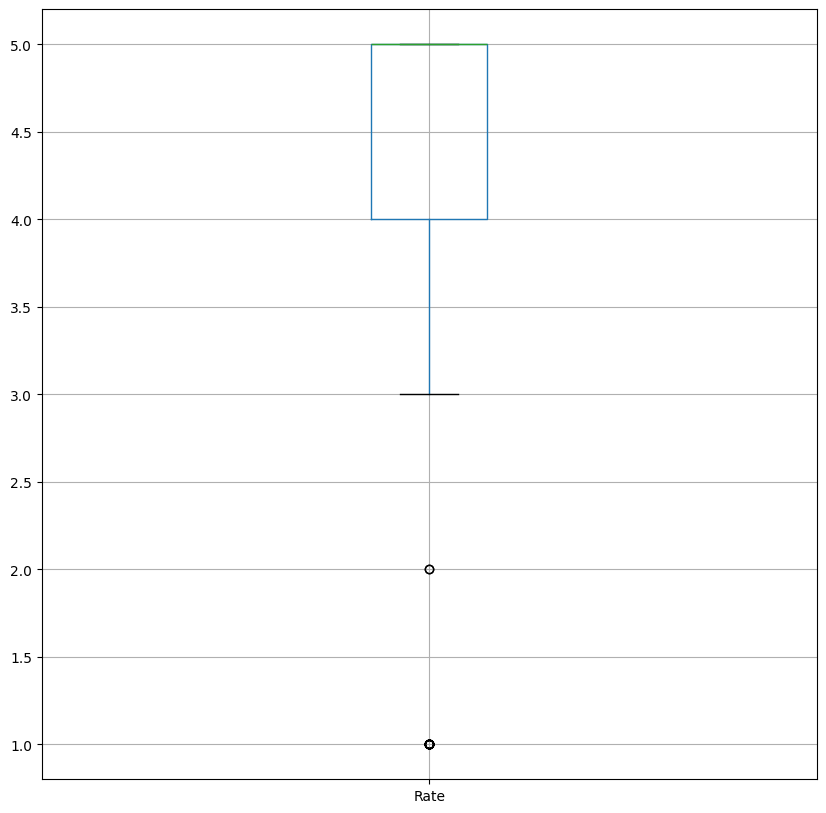

In [569]:
#cek outlier Rate
plt.figure(figsize=(10, 10))  # Penulisan yang benar
df.boxplot(column=['Rate'])
plt.show()

In [570]:
# Quartile & IQR(Rate)
Q1_Rate = df['Rate'].quantile(0.25)
Q3_Rate = df['Rate'].quantile(0.75)
IQR_Rate = Q3_Rate - Q1_Rate

#batas atas dan bawah
lower_Rate = Q1_Rate - 1.5 * IQR_Rate
upper_Rate = Q3_Rate + 1.5 * IQR_Rate

# menampilkan
print(f'Q1 = {Q1_Rate}, Q3 = {Q3_Rate}, IQR = {IQR_Rate}')
print(f'lower_Rate = {lower_Rate}, upper_Rate = {upper_Rate}')

Q1 = 4.0, Q3 = 5.0, IQR = 1.0
lower_Rate = 2.5, upper_Rate = 6.5


In [571]:
# menampilkan data outlier
df[(df['Rate'] < lower_Rate) | (df['Rate'] > upper_Rate)].shape

(22, 6)

In [572]:
# Menampilkan data tanpa outlier
df['Rate'] = np.where(df['Rate'] > upper_Rate, upper_Rate,
                     np.where(df['Rate'] < lower_Rate, lower_Rate, df['Rate']))

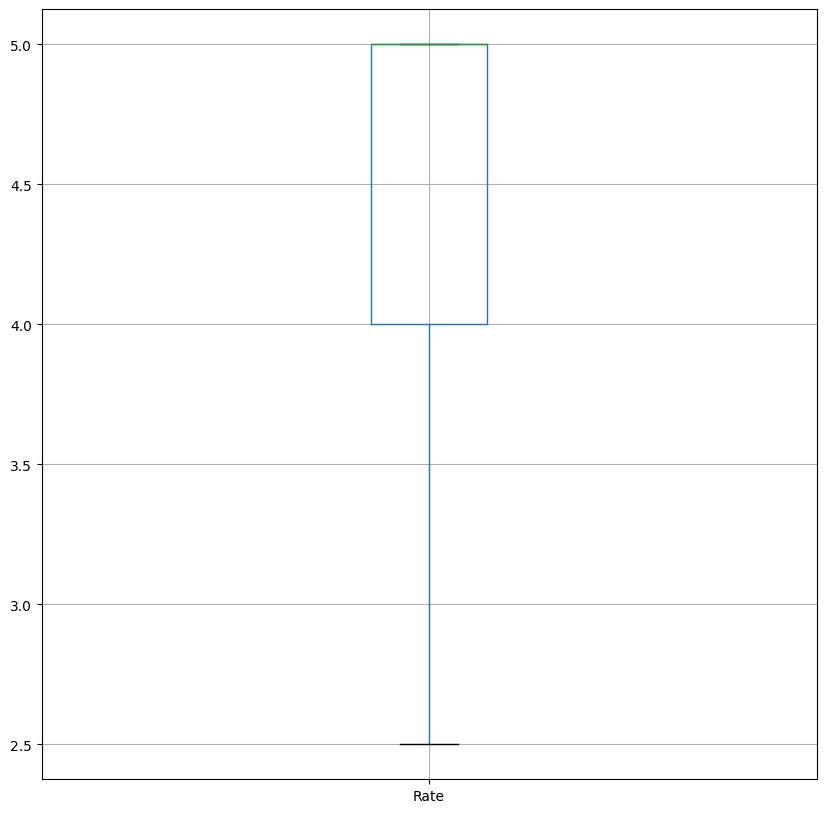

In [573]:
#cek kembali
plt.figure(figsize=(10, 10))  # Penulisan yang benar
df.boxplot(column=['Rate'])
plt.show()

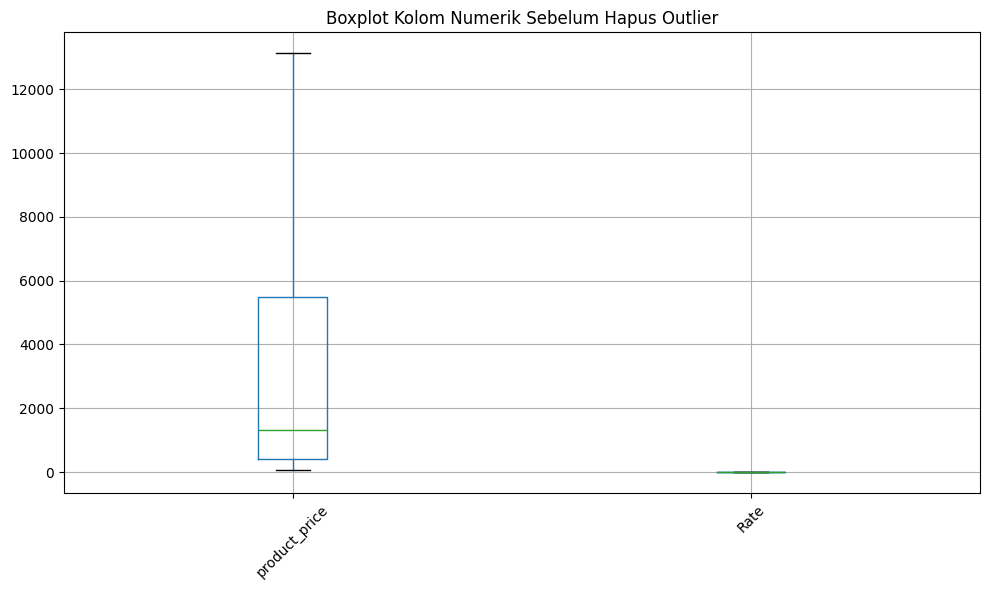

In [574]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Boxplot Kolom Numerik Sebelum Hapus Outlier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [575]:
# # Simpan data yang sudah diolah ke dalam file CSV
# df.to_csv('product_review_cleaned.csv', index=False)
